In [38]:
import pandas as pd
import matplotlib.pyplot as pls

In [39]:
media_municipio = pd.read_csv("media_notas_por_municipio.csv", sep=",", index_col=0)


In [40]:
media_municipio

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,11,RO,480.653117,554.668286,504.495652,519.142005,460.051151
1,1100023,Ariquemes,11,RO,476.134097,549.811621,508.440787,508.070983,448.096330
2,1100031,Cabixi,11,RO,468.973846,546.226389,493.195833,505.800000,445.277778
3,1100049,Cacoal,11,RO,484.373259,559.568811,518.981172,522.344497,471.500169
4,1100056,Cerejeiras,11,RO,477.077656,556.285172,511.496552,507.730037,459.310345
...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,493.409052,552.642259,517.681172,525.894397,480.083682
5566,5222054,Vicentinópolis,52,GO,469.161429,523.104819,487.281928,506.642857,419.277108
5567,5222203,Vila Boa,52,GO,459.281250,517.789474,466.771053,494.637500,353.684211
5568,5222302,Vila Propício,52,GO,455.734694,513.081905,473.814286,476.962245,392.380952


In [41]:
atlas_idhm = pd.read_csv("dados_idhm.csv", sep=";", index_col=0)


In [42]:
atlas_idhm.columns.values

array(['Posição IDHM', 'IDHM', 'Posição IDHM Renda', 'IDHM Renda',
       'Posição IDHM Educação', 'IDHM Educação',
       'Posição IDHM Longevidade', 'IDHM Longevidade', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype=object)

In [43]:
nova_tabela = atlas_idhm.filter(items=['Territorialidade', 'Posição IDHM', 'IDHM', 'Posição IDHM Renda', 'IDHM Renda',
       'Posição IDHM Educação', 'IDHM Educação',
       'Posição IDHM Longevidade', 'IDHM Longevidade'])
nova_tabela

,Posição IDHM,IDHM,Posição IDHM Renda,IDHM Renda,Posição IDHM Educação,IDHM Educação,Posição IDHM Longevidade,IDHM Longevidade
Territorialidade,,,,,,,,
Zortéa,64,"0,761",10,"0,885",116,"0,661",86,"0,752"
Zé Doca,230,"0,595",150,"0,745",272,"0,505",279,"0,559"
Zacarias,96,"0,729",69,"0,826",103,"0,674",143,"0,695"
Zabelê,202,"0,623",170,"0,725",190,"0,587",271,"0,567"
Xique-Xique,240,"0,585",154,"0,741",298,"0,479",275,"0,563"
...,...,...,...,...,...,...,...,...
Abaetetuba,197,"0,628",97,"0,798",240,"0,537",259,"0,579"
Abaeté,127,"0,698",47,"0,848",221,"0,556",118,"0,72"
Abadiânia,136,"0,689",54,"0,841",198,"0,579",167,"0,671"


In [44]:
#as 2 colunas possuem mesmo valores em cada tabela, então da pra fazer merge:
enem_idhm = pd.merge(media_municipio, nova_tabela, how="left", left_on=["NO_MUNICIPIO_RESIDENCIA"], 
                     right_on=["Territorialidade"])

In [45]:
enem_idhm

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Posição IDHM,IDHM,Posição IDHM Renda,IDHM Renda,Posição IDHM Educação,IDHM Educação,Posição IDHM Longevidade,IDHM Longevidade
0,1100015,Alta Floresta D'Oeste,11,RO,480.653117,554.668286,504.495652,519.142005,460.051151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1100023,Ariquemes,11,RO,476.134097,549.811621,508.440787,508.070983,448.096330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1100031,Cabixi,11,RO,468.973846,546.226389,493.195833,505.800000,445.277778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1100049,Cacoal,11,RO,484.373259,559.568811,518.981172,522.344497,471.500169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1100056,Cerejeiras,11,RO,477.077656,556.285172,511.496552,507.730037,459.310345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,493.409052,552.642259,517.681172,525.894397,480.083682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5566,5222054,Vicentinópolis,52,GO,469.161429,523.104819,487.281928,506.642857,419.277108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5567,5222203,Vila Boa,52,GO,459.281250,517.789474,466.771053,494.637500,353.684211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5568,5222302,Vila Propício,52,GO,455.734694,513.081905,473.814286,476.962245,392.380952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
nova_tabela['IDHM'] = nova_tabela['IDHM'].apply(lambda x: float(str(x).replace(",", ".")))

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='IDHM'>

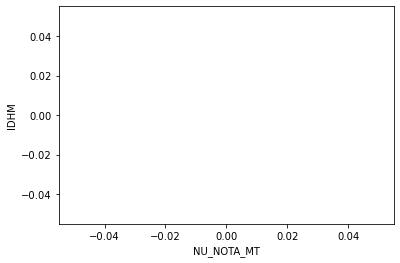

In [53]:
enem_idhm.plot.scatter("NU_NOTA_MT", "IDHM")